In this file we will expolore our dataset from"Employers" of Drexel students answering the question "What are the student's strengths?"

In [1]:
#Importing necessary libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

In [2]:
# Importing datasets and print sheet names
xls = pd.ExcelFile('/Users/otabekjuraev/OneDrive - Sejong University/DREXEL/Courses/MIS/Week 3/dataset/student_data.xlsx')
xls.sheet_names



['Classroom Activities Question',
 'Coursework Question',
 'Most Imp Skills',
 'Skills to develop',
 'What made job interesting',
 'Learn & Focus on']

In [3]:
df = xls.parse('Classroom Activities Question')
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Citizenship Status,Co-op #,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."
0,11,201415-201425,JR,B,FIN,4COP,NaN,US Citizen,Only,"Very well prepared from Drexel, overall awesom..."
1,29,201415-201425,SR,B,ACCT,4COP,NaN,US Citizen,Only,I believe the Interactive Marketing class that...
2,55,201415-201425,JR,B,ACCT,5COP,NaN,US Citizen,Third,When I reflect on the past 6 months at [Employ...
3,61,201425-201425,JR,B,BAE,5COP,NaN,Non US Citizen,Second,The co-op was unrelated to much of the coursew...
4,66,201415-201425,SR,B,FIN,4COP,NaN,US Citizen,Only,The position I held at [Employer] was sales re...
...,...,...,...,...,...,...,...,...,...,...
1401,5921,201435-201445,JR,B,GBUS,4COP,NaN,US Citizen,Only,During the time that I worked at [Employer] as...
1402,5922,201435-201435,JR,B,MKTG,5COP,NaN,Non US Citizen,First,"I am a transfer student, so I have only had 2 ..."
1403,5932,201435-201445,JR,B,GBUS,4COP,NaN,US Citizen,Only,Not much in the classroom helped me with my jo...
1404,5938,201435-201445,PJ,B,GBUS,4COP,NaN,US Citizen,Only,I think that the biggest thing that was missin...


In [12]:
df["Major Code"].value_counts()

FIN     367
MKTG    258
GBUS    220
ACCT    196
BAE     106
ENTR     59
INT1     59
MIS      49
LGST     34
ECON     23
OSCM     23
INT2      8
BUAN      4
Name: Major Code, dtype: int64

In [11]:
df["Co-op #"].value_counts()

First     478
Second    407
Third     337
Only      184
Name: Co-op #, dtype: int64

In [5]:
df["Class (BOT)"].value_counts()

JR    466
SR    399
PJ    336
SO    184
FR     21
Name: Class (BOT), dtype: int64

In [9]:
df["Coop Conc"].value_counts()

5COP    1211
4COP     195
Name: Coop Conc, dtype: int64

In [ ]:
# So we have 1406 rows and 10 columns in our dataset.

In [8]:
df.shape

(1406, 10)

In [9]:
# Checking for missing values in columns
df.isnull().sum()

Respondent ID                                                                                                                                                                                                                                                                                                                                                                                                                            0
Work Terms                                                                                                                                                                                                                                                                                                                                                                                                                               0
Class (BOT)                                                                                                                                       

In [11]:
# We have 1375 missing values in "Major Conc" column, since don't neet this data we delete it from our dataframe.
try:
    df.isnull().sum()
    df = df.drop("Major Conc", axis=1)
except:
    print("Completed")


Completed


# Delete rows with missing values

In [12]:
df = df.dropna(subset=["Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."])

In [13]:
# This how our target text data looks like. 708 rows of valid data left
df

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Citizenship Status,Co-op #,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."
0,11,201415-201425,JR,B,FIN,4COP,US Citizen,Only,"Very well prepared from Drexel, overall awesom..."
1,29,201415-201425,SR,B,ACCT,4COP,US Citizen,Only,I believe the Interactive Marketing class that...
2,55,201415-201425,JR,B,ACCT,5COP,US Citizen,Third,When I reflect on the past 6 months at [Employ...
3,61,201425-201425,JR,B,BAE,5COP,Non US Citizen,Second,The co-op was unrelated to much of the coursew...
4,66,201415-201425,SR,B,FIN,4COP,US Citizen,Only,The position I held at [Employer] was sales re...
...,...,...,...,...,...,...,...,...,...
1401,5921,201435-201445,JR,B,GBUS,4COP,US Citizen,Only,During the time that I worked at [Employer] as...
1402,5922,201435-201435,JR,B,MKTG,5COP,Non US Citizen,First,"I am a transfer student, so I have only had 2 ..."
1403,5932,201435-201445,JR,B,GBUS,4COP,US Citizen,Only,Not much in the classroom helped me with my jo...
1404,5938,201435-201445,PJ,B,GBUS,4COP,US Citizen,Only,I think that the biggest thing that was missin...


In [14]:
#check for missiing values
df.isnull().sum()

Respondent ID                                                                                                                                                                                                                                                                                                                                                                                                                         0
Work Terms                                                                                                                                                                                                                                                                                                                                                                                                                            0
Class (BOT)                                                                                                                                             

In [15]:
# No missing values in our dataset

# Working on removing contraction words

Before removing all punctuation we will convert contractions into whole words not to lose some information.

"Contractions are a unique type of word that combines two or more other words in a shortened form, 
usually with an apostrophe. Contractions take words that usually go together, 
like can not or I have, and then remove certain letters to shorten them and make other words, like can’t or I’ve." (Source: https://www.grammarly.com/blog/contractions/)

It is useful to keep those word in order to keep sentiment of the sentences.

In [16]:
import contractions

In [17]:
contractions_re=re.compile('(%s)' % '|'.join(contractions.contractions_dict.keys()))

In [18]:
contractions.contractions_dict.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [19]:
dt = contractions.contractions_dict
def update_text(text):
    for key in dt:
        text = re.sub(key, dt[key], text)
    return text

In [20]:
def expand_contractions(text,contractions_dict=contractions.contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [22]:
df["processed"] = df["Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible."].apply(lambda x: update_text(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Citizenship Status,Co-op #,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible.",processed
624,79,201435-201445,SR,B,GBUS,5COP,US Citizen,Third,I think that classroom activities do not reall...,I think that classroom activities do not reall...
617,25,201435-201445,JR,B,GBUS,4COP,US Citizen,Only,I found that my classroom experiences outside ...,I found that my classroom experiences outside ...
1154,3638,201435-201445,PJ,B,GBUS,5COP,US Citizen,First,"As I presumed, my COOP didn't really have much...","As I presumed, my COOP did not really have muc..."
1092,3321,201435-201445,SO,B,GBUS,5COP,US Citizen,First,"Previous to my co-op, my major was general bus...","Previous to my co-op, my major was general bus..."
1312,5150,201435-201445,SR,B,FIN,5COP,US Citizen,Third,I think my classroom activities did not prepar...,I think my classroom activities did not prepar...
1255,4501,201435-201445,SR,B,MKTG,5COP,US Citizen,Third,"Overall, I think that my classroom activities ...","Overall, I think that my classroom activities ..."
632,133,201445-201445,PJ,B,MKTG,5COP,US Citizen,Second,Co-Op Reflectio...,Co-Op Reflectio...
1246,4415,201435-201445,SR,B,FIN,5COP,US Citizen,Third,Classroom activities have certainly helped in ...,Classroom activities have certainly helped in ...
610,5886,201415-201425,PJ,B,GBUS,5COP,US Citizen,Second,I felt that the classroom prepared me for long...,I felt that the classroom prepared me for long...
1103,3373,201435-201445,JR,B,FIN,5COP,US Citizen,First,I'm not sure if a classroom environment really...,I am not sure if a classroom environment reall...


# Lowercase the text

In [23]:
df['processed']=df["processed"].apply(lambda x: x.lower())

In [25]:
#checking results
df["processed"]

0       very well prepared from drexel, overall awesom...
1       i believe the interactive marketing class that...
2       when i reflect on the past 6 months at [employ...
3       the co-op was unrelated to much of the coursew...
4       the position i held at [employer] was sales re...
                              ...                        
1401    during the time that i worked at [employer] as...
1402    i am a transfer student, so i have only had 2 ...
1403    not much in the classroom helped me with my jo...
1404    i think that the biggest thing that was missin...
1405    i will study accounting classes and excel hard...
Name: processed, Length: 1405, dtype: object

# Remove all digits

In [26]:
df['processed']=df['processed'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

# Removing punctuations

In [27]:
df['processed'] = df['processed'].apply(lambda i: re.sub('[%s]' % re.escape(string.punctuation), '', str(i)))

In [28]:
#Checking the results
df['processed'].sample(10)

676     since i transferred majors i am a little behin...
1329    i believe classroom activities did prepare me ...
704     after six months of coop i am now able to comp...
628     i think that my education experiences thus far...
682     i believe that my education experience has pre...
112     there may have been some ththemes from my firs...
620     the cooperative education experience was very ...
1167    group projects in class helped me prepare to w...
572     reflecting on my recent cooperative education ...
456     i believe my classroom activities helped me a ...
Name: processed, dtype: object

# Removing extra spaces between words

In [29]:
df.loc['processed']=df['processed'].apply(lambda i: re.sub(' +',' ',i))

In [30]:
# Checking results
df["processed"].sample(10)

575     i feel that my classroom activities prepared m...
1104    drexel courses have been an eye opener for me ...
928     i believe that my previous classroom activitie...
1040    the first and arguably most important takeaway...
880     as for my experience gained before coop it was...
653     based on my recent cooperative education exper...
400     upon completion of my final coop i felt mostly...
661     reflecting back on my coop i felt that there w...
1355    i do think that some parts of the classroom ha...
1271    as my final coop experience comes to an end i ...
Name: processed, dtype: object

# Removing Stop words

In [31]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [32]:
txt = df['processed'].values[0]
i =0
for token in list(nlp(txt)):
    print(i+1,":", token, token.is_stop, token.lemma_)
    i = i+1
#checking the results

1 : very True very
2 : well True well
3 : prepared False prepared
4 : from True from
5 : drexel False drexel
6 : overall False overall
7 : awesome False awesome
8 : experience False experience
9 : with True with
10 : drexelcoop False drexelcoop
11 : no True no
12 : was True be
13 : well True well
14 : prepared False prepared
15 : no True no
16 : suggestions False suggestion
17 : i True I
18 : had True have
19 : a True a
20 : great False great
21 : experience False experience
22 : here True here
23 : and True and
24 : learned False learn
25 : a True a
26 : great False great
27 : deal False deal
28 : despite False despite
29 : a True a
30 : few True few
31 : challenges False challenge
32 : ie False ie
33 : getting False get
34 : food False food
35 : position False position
36 : having False have
37 : little False little
38 : to True to
39 : do True do
40 : with True with
41 : employer False employer
42 : drexel False drexel
43 : prepared False prepare
44 : me True I
45 : very True very
4

#  Lemmitazation 
# Removing stop words  
# Correcting misspelled words

In [35]:
from textblob import TextBlob
def rem_stop_words_lemmatizing(txt):
    ans = []
    for token in nlp(txt):
        # Cheking and removing stop words
        if not token.is_stop:
            # This part lemmatizes words, checks misspelled words and corrects them
            ans.append(str(token.lemma_))
    return " ".join([word for word in ans])

In [36]:
# df['lemmatized']=df['processed'].apply(lambda i: ' '.join([token.lemma_ for token in list(nlp(i)) if (token.is_stop==False)]))
df['lemmatized'] = df['processed'].astype(str).apply(lambda x: rem_stop_words_lemmatizing(x))
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Citizenship Status,Co-op #,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible.",processed,lemmatized
690,544.0,201435-201445,JR,B,FIN,5COP,US Citizen,First,My courses at Drexel University very much prep...,my courses at drexel university very much prep...,course drexel university prepare coop course...
1141,3571.0,201435-201445,PJ,B,MKTG,5COP,US Citizen,First,"Before my first coop, I did not learn any part...",before my first coop i did not learn any parti...,coop learn particular marcheting skill class m...
421,4659.0,201415-201425,SO,B,ENTR,5COP,US Citizen,Second,I believe that my classes in business such as ...,i believe that my classes in business such as ...,believe class business managthement informatio...
1237,4312.0,201435-201445,SR,B,BAE,5COP,US Citizen,Third,"Of my three co-op experiences, [Employer] most...",of my three coop experiences employer most dir...,coop experience employer directly correlate cl...
44,982.0,201415-201425,JR,B,FIN,4COP,Non US Citizen,Only,I think study here is a great experience to me...,i think study here is a great experience to me...,think study great experience college life colo...
416,4637.0,201415-201425,PJ,B,MKTG,5COP,Non US Citizen,Second,Coming to Drexel is one of the best decisions ...,coming to drexel is one of the best decembersi...,come drexel good decembersion coop program out...
5,77.0,201425-201425,SR,B,ENTR,4COP,US Citizen,Only,I feel for this particular co-op experience I ...,i feel for this particular coop experience i w...,feel particular coop experience prepared posit...
489,5114.0,201415-201425,PJ,B,BAE,5COP,US Citizen,Second,I think it's wrong that Lebow waits so late in...,i think it is wrong that lebow waits so late i...,think wrong lebow wait late one study introduc...
1115,3427.0,201435-201445,SO,B,GBUS,5COP,US Citizen,First,I honestly do think that there could have been...,i honestly do think that there could have been...,honestly think classroom activity prepare job ...
42,918.0,201415-201425,SO,B,BAE,5COP,US Citizen,First,While reflecting upon my recent cooperative ed...,while reflecting upon my recent cooperative ed...,reflect recent cooperative educational experie...


In [37]:
df.sample(10)

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Citizenship Status,Co-op #,"Reflecting upon your recent cooperative education experience, how well do you think your classroom activities prepared you? Was there anything missing that you felt would have better prepared you? Do you have any suggestions on how to improve you classroom activities to prepare you for your career? Please compose a 300-400 word reflective essay addressing these issues, including specific examples whenever possible.",processed,lemmatized
817,1494.0,201435-201445,JR,B,FIN,5COP,US Citizen,Second,"Truthfully, the classroom experience has not h...",truthfully the classroom experience has not he...,truthfully classroom experience help respect c...
1062,3080.0,201435-201445,SO,B,GBUS,5COP,US Citizen,First,As the job did not require any special knowled...,as the job did not require any special knowled...,job require special knowledge class assist thi...
893,1896.0,201435-201445,JR,B,ACCT,5COP,US Citizen,Second,After completing my second co-op here at Drexe...,after completing my second coop here at drexel...,complete second coop drexel help feel prepared...
1016,2760.0,201435-201445,JR,B,MKTG,5COP,US Citizen,First,I believe that my classroom activities in the ...,i believe that my classroom activities in the ...,believe classroom activity past business skill...
613,5894.0,201415-201425,JR,B,ACCT,5COP,Resident Alien Non-Citizen,Second,The group activities in the classes enabled me...,the group activities in the classes enabled me...,group activity class enable engage interact ef...
829,1557.0,201435-201435,JR,B,ENTR,5COP,US Citizen,Second,My co-op at [Employer] was cut short due to a ...,my coop at employer was cut short due to a fam...,coop employer cut short family themergency wee...
331,4101.0,201425-201435,JR,B,ACCT,5COP,US Citizen,Second,\tI think to a degree the classroom prepares y...,\ti think to a degree the classroom prepares y...,\t think degree classroom prepare workplace th...
119,2420.0,201415-201425,SO,B,ENTR,5COP,US Citizen,First,My Co-Op 101 course explained all of the detai...,my coop course explained all of the details o...,coop course explain detail obtain dream coop...
421,4659.0,201415-201425,SO,B,ENTR,5COP,US Citizen,Second,I believe that my classes in business such as ...,i believe that my classes in business such as ...,believe class business managthement informatio...
590,5787.0,201415-201425,JR,B,FIN,5COP,US Citizen,Third,Reflecting on my last coop I feel there are so...,reflecting on my last coop i feel there are so...,reflect coop feel thing help prepare work time...


In [41]:
# Chercking results
print("Edited >>:", df.loc[478, "lemmatized"])
print("Unedited >>:", df.loc[478, "processed"])


Edited >>: time employer learn way problthem solve number collect datum center skill number work come know great strength connect work ththem drexel taugustt live fast lane work brain immensely learn thing precision pressure take consideration come new job confidence ease work load receive worry like tell " end world … " 
 believe activity like join program benefit physically better great future hobby help physically help wellbeing overall happiness generally energy physical activity good physically mentally believe better physically easy time brain muscle 
 listen carefully class big plus get internship importance say try grasp mistake notice small thing throw lot use number way double check sure thing forsure correct 
 overall experience employer amazing time bore work let people team work honestly energy super kind 

Unedited >>: during my time here at employer i have learned many ways to problthem solve using numbers collected from their data center with my skills in numbers and wo

# Vectorize preprocessed data

## N-gram (n=1)

In [43]:
# Here we will create Words frequency matrix (One-word) 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (1,1))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm_1 = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm_1.index=df.index
df_dtm_1.head(3)

,ab,abbreviation,abcround,ability,able,ablt,abnormal,abrasive,abroad,abrupt,...,yield,york,youjust,young,youtube,zeal,zenefit,zero,zoho,zone
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## N-gram (n=2)

In [45]:
# Here we will create Words frequency matrix (Two word)
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range = (2,2))
data_new=cv.fit_transform(df["lemmatized"])
data_new.shape
df_dtm = pd.DataFrame(data_new.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df.index
df_dtm.head(3)

,ab test,ab testing,abbreviation vocabulary,abcround major,ability ability,ability able,ability acclimate,ability accumulate,ability adapt,ability add,...,zoho marcheting,zone actively,zone deliver,zone grow,zone like,zone realize,zone step,zone student,zone team,zone work
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize data

## Word Cloud

In [46]:
from wordcloud import WordCloud
from textwrap import wrap

## Word Cloud One-word

In [58]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

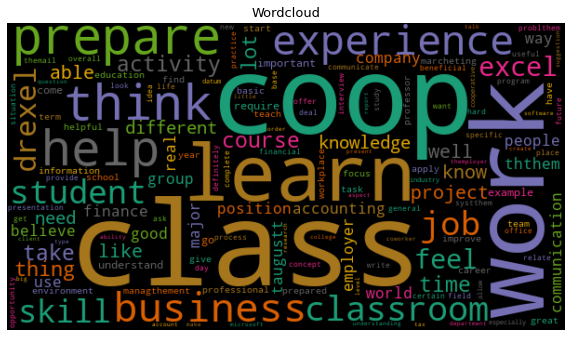

In [59]:
generate_wordcloud(data = df_dtm_1.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart One-word

In [60]:
word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:15].to_dict()
word_freqs_1

{'class': 4321,
 'coop': 3691,
 'work': 2977,
 'learn': 2256,
 'prepare': 1900,
 'think': 1812,
 'help': 1806,
 'experience': 1803,
 'business': 1703,
 'classroom': 1672,
 'job': 1573,
 'student': 1514,
 'skill': 1419,
 'drexel': 1278,
 'excel': 1068}

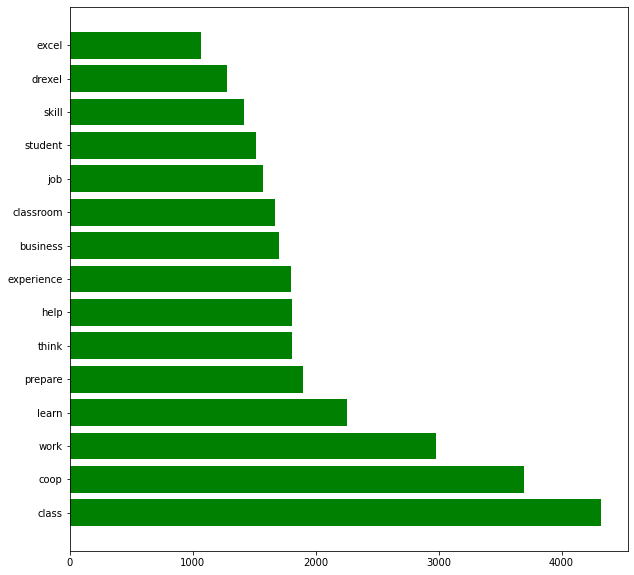

In [61]:
import matplotlib.pyplot as plt


word_freqs_1 = df_dtm_1.sum(axis=0).sort_values(ascending=False)[:30].to_dict()
# removing unnecessary words

banned = ["job","want", "focus", "marcheting", "class", "return", "different", "co", "lot", "op", "datum", "work", "need", "day", "give", "feel", "help", "able", "important", "ability","skill", "improve", "like", "well", "learn", "think"]

for keys in word_freqs_1.copy():
    if keys in banned:
        del word_freqs_1[keys]


plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs_1)), word_freqs_1.values(),color='green')

plt.yticks(range(len(word_freqs_1)), word_freqs_1.keys())
plt.yticks(rotation = 0)


plt.show()

## Word Cloud One-word

In [67]:
def generate_wordcloud(data,title):
  wc = WordCloud(width=600, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

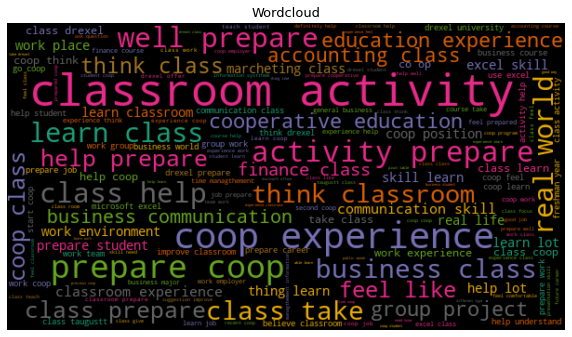

In [68]:
generate_wordcloud(data = df_dtm.sum(axis=0).to_dict(), title = "Wordcloud")

# Word frequency bar chart Two-word

In [74]:
word_freqs = df_dtm.sum(axis=0).sort_values(ascending=False)[:15].to_dict()
word_freqs.pop("classroom activity")

764

In [75]:
import matplotlib.pyplot as plt

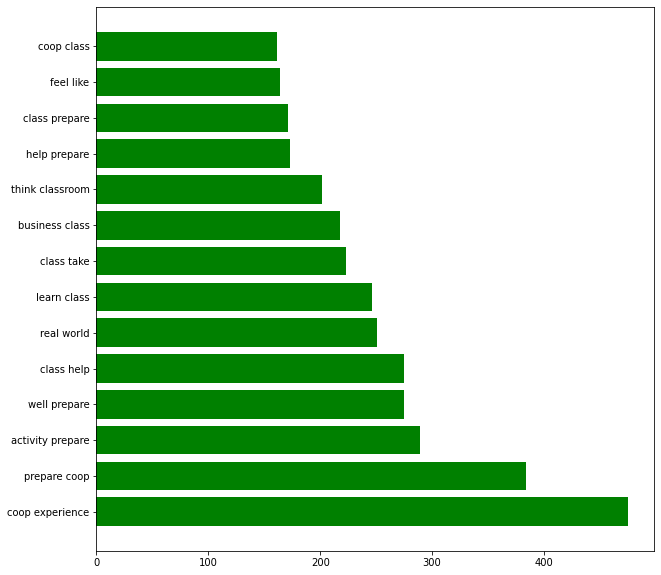

In [76]:
plt.figure(figsize = (10, 10))
plt.barh(range(len(word_freqs)), word_freqs.values(),color='green')

plt.yticks(range(len(word_freqs)), word_freqs.keys())
plt.yticks(rotation = 0)
plt.show()